### Reconstruction of the Lorenz System with the SINDy Algorithm

The **Lorenz system** is a set of three nonlinear ordinary differential equations (ODEs):

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = x y - \beta z
$$

This system exhibits chaotic behavior for certain values of the parameters: $$\sigma = 10$$ $$\rho = 28$$ $$\beta = 8/3$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pysindy as ps

We can build a function to calculate the derivatives of **X**, **Y** and **Z** 

In [2]:
def lorenz(xyz, s=10, r=28, b=8/3):
    x, y, z = xyz
    x_dot = s * (y - x)
    y_dot = x * (r - z) - y
    z_dot = x * y - b * z
    return np.array([x_dot, y_dot, z_dot]) 

Let's solve the equations numerically, we'll use a time step of **0.01** and **10000** iterations

In [3]:
dt = 0.01
num_steps = 10000
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (1, 1, 1) #initial conditions

We now compute the data points using the **derivatives** with a for loop

In [4]:
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

Let's graph the solutions for **X**,**Y** and **Z**

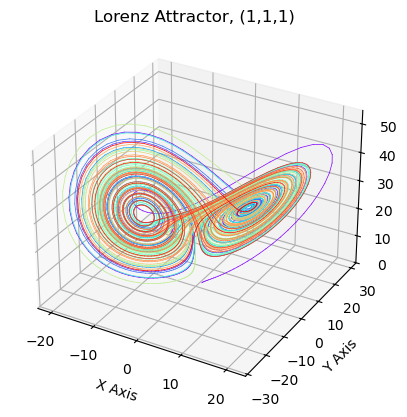

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, num_steps))
for i in range(num_steps):
    ax.plot(xyzs[i:i+2, 0], xyzs[i:i+2, 1], xyzs[i:i+2, 2], color=colors[i], lw=0.5)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor, (1,1,1)")
plt.style.use('default')
plt.show()

We'll illustrate how **chaotic behavior**  in a **dynamical system works**, let's compute **X**, **Y** and **Z** but with slightly different initial conditions

In [6]:
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (1.000000001, 1, 1)  #Slight change to the initial conditions

In [7]:
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

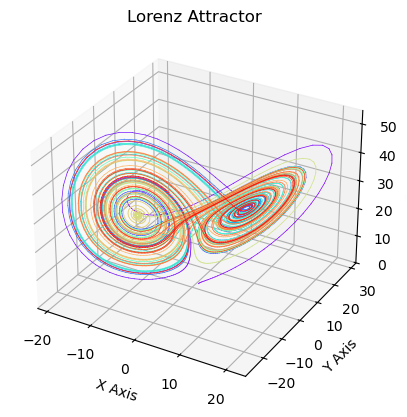

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, num_steps))
for i in range(num_steps):
    ax.plot(xyzs[i:i+2, 0], xyzs[i:i+2, 1], xyzs[i:i+2, 2], color=colors[i], lw=0.5)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.style.use('default')
plt.show()

Small differences in initial conditions grow exponentially over time, leading to vastly different outcomes.

We demonstrate the **sensitive dependence on initial conditions** characteristic of chaotic systems.

### Implementation of the SINDy Algorithm
The **Sparse Identification of Nonlinear Dynamics (SINDy)** algorithm reconstructs the governing equations of a dynamical system from known data.

In this experiment, we'll generate XYZ coordinates from the Lorenz system to feed into the SINDy model. The algorithm will evaluate candidate functions and identify the best dynamical system that describes the data. We expect to recover the Lorenz equations as the output.

In [9]:
dt = 0.01
xyzs[0] = (1, 1, 1) 
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt   #We us ethe same methodology to obtain the XYZ coordinates 


The **SINDy** model is configured as follows:
- **Optimizer**: We use **STLSQ** (Sparse Total Least Squares) with a threshold of **0.05** and a maximum of **150 iterations** to identify sparse coefficients for the dynamics.
- **Feature Library**: The **PolynomialLibrary** is set with a degree of **2**, including interaction terms but excluding a bias term, allowing for the identification of nonlinear relationships.
- **Differentiation Method**: **Finite Difference** with first-order differentiation is applied to estimate the time derivatives of the data.


In [10]:
model = ps.SINDy(
    optimizer=ps.STLSQ(  
        threshold=0.05,       
        max_iter=150,      
    ),
    feature_library=ps.PolynomialLibrary(
        degree=2,               
        include_interaction=True,  
        include_bias=False      
    ),
    differentiation_method=ps.FiniteDifference(order=1)  
)


We now feed the data into the model and print the found equations

In [11]:
model.fit(xyzs, t=dt)
model.print()

(x0)' = -10.000 x0 + 10.000 x1
(x1)' = 28.000 x0 + -1.000 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1


As seen, the **SINDy algorithm** was able to capture the correct Lorenz dynamics from the given data.